In [1014]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import tensorflow as tf
from tensorflow import keras
import catboost as ycb

## Configure

In [1015]:
tf.config.set_visible_devices([], 'GPU')

## Import dataset

pclass - ticket class \
sex - sex \
age - age in years \
sibsp - number of siblings / spouses aboard the Titanic \
parch - number of parents / children aboard the Titanic \
ticket - ticket number \
fare - passenger fare \
cabin - cabin number \
embarked - port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) \
survived - 0 - no, 1 - yes

In [1016]:
dataset_df = pd.read_csv('titanic.csv')
dataset_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Visualization

In [1017]:
survived_df = dataset_df[dataset_df['Survived'] == 1]
not_survived_df = dataset_df[dataset_df['Survived'] == 0]

survived_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [1018]:
survived_percent = len(survived_df) / len(dataset_df) * 100
survived_percent

38.38383838383838

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

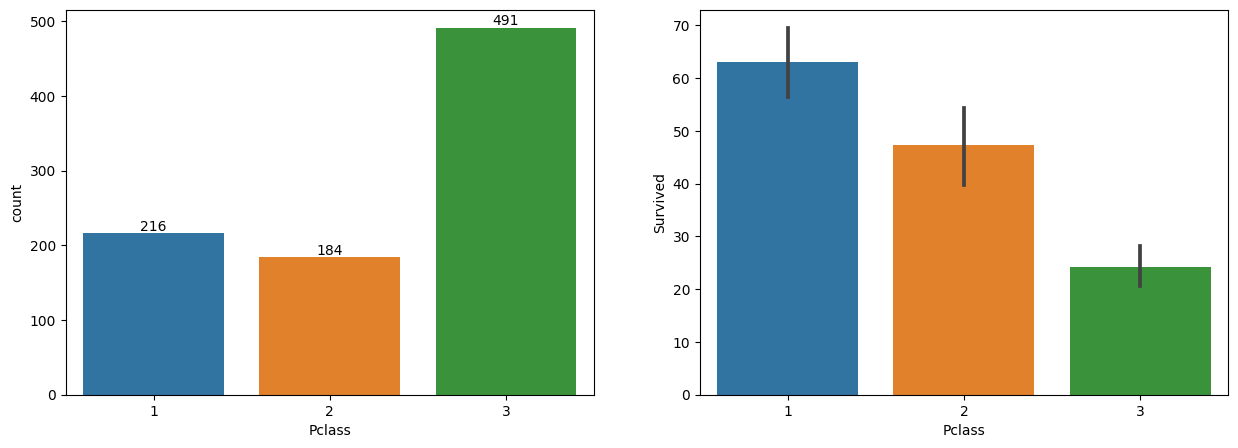

In [1019]:
figure, axes = plt.subplots(1, 2, figsize=(15, 5))
axis = sns.countplot(dataset_df, x='Pclass', ax=axes[0])
axis.bar_label(axis.containers[0])
sns.barplot(
  dataset_df,
  x='Pclass',
  y='Survived',
  estimator=lambda x: sum(x == 1) * 100.0 / len(x),
  ax=axes[1],
)

<AxesSubplot: xlabel='SibSp', ylabel='Survived'>

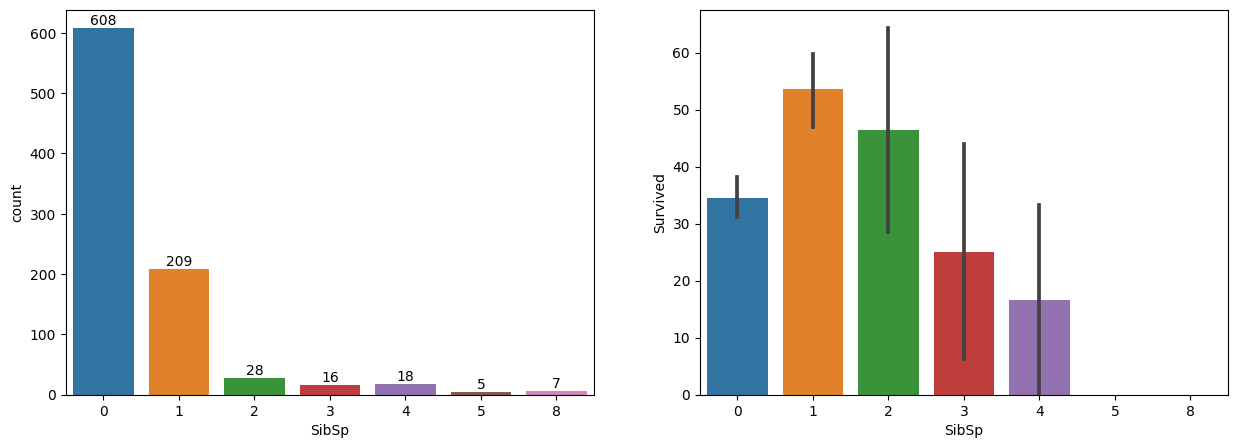

In [1020]:
figure, axes = plt.subplots(1, 2, figsize=(15, 5))
axis = sns.countplot(dataset_df, x='SibSp', ax=axes[0])
axis.bar_label(axis.containers[0])
sns.barplot(
  dataset_df,
  x='SibSp',
  y='Survived',
  estimator=lambda x: sum(x == 1) * 100.0 / len(x),
  ax=axes[1],
)

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

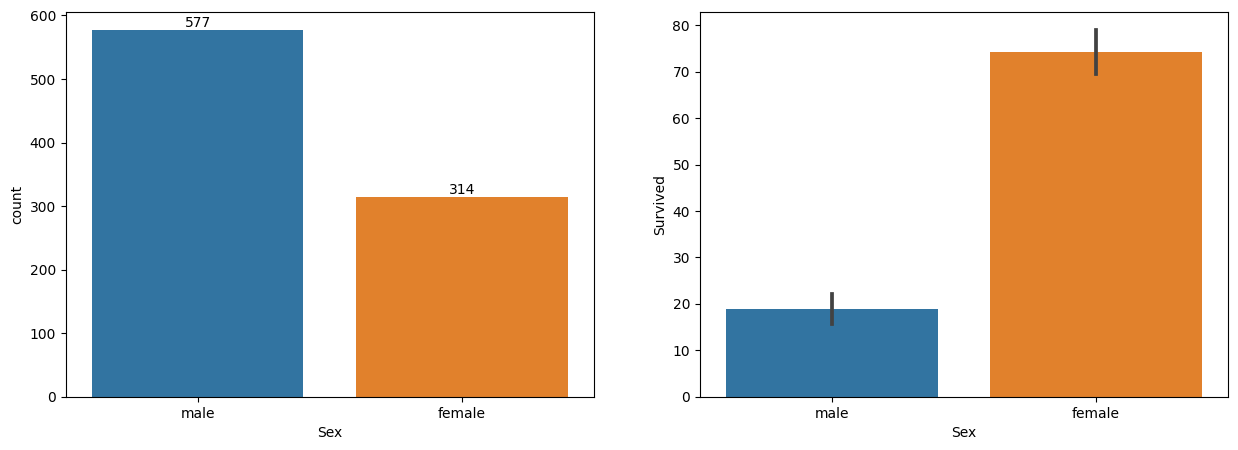

In [1021]:
figure, axes = plt.subplots(1, 2, figsize=(15, 5))
axis = sns.countplot(dataset_df, x='Sex', ax=axes[0])
axis.bar_label(axis.containers[0])
sns.barplot(
  dataset_df,
  x='Sex',
  y='Survived',
  estimator=lambda x: sum(x == 1) * 100.0 / len(x),
  ax=axes[1],
)

<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

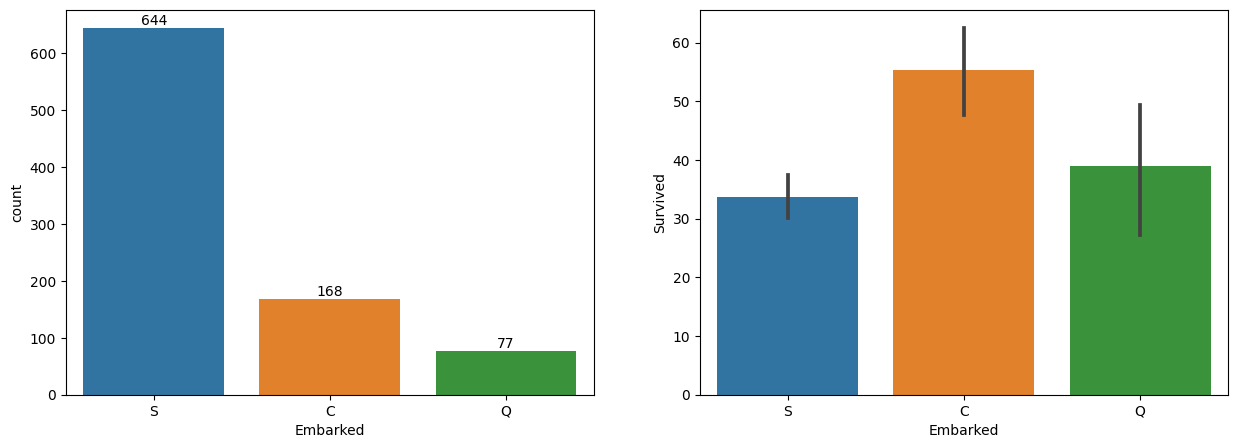

In [1022]:
figure, axes = plt.subplots(1, 2, figsize=(15, 5))
axis = sns.countplot(dataset_df, x='Embarked', ax=axes[0])
axis.bar_label(axis.containers[0])
sns.barplot(
  dataset_df,
  x='Embarked',
  y='Survived',
  estimator=lambda x: sum(x == 1) * 100.0 / len(x),
  ax=axes[1],
)

<AxesSubplot: xlabel='Age', ylabel='Count'>

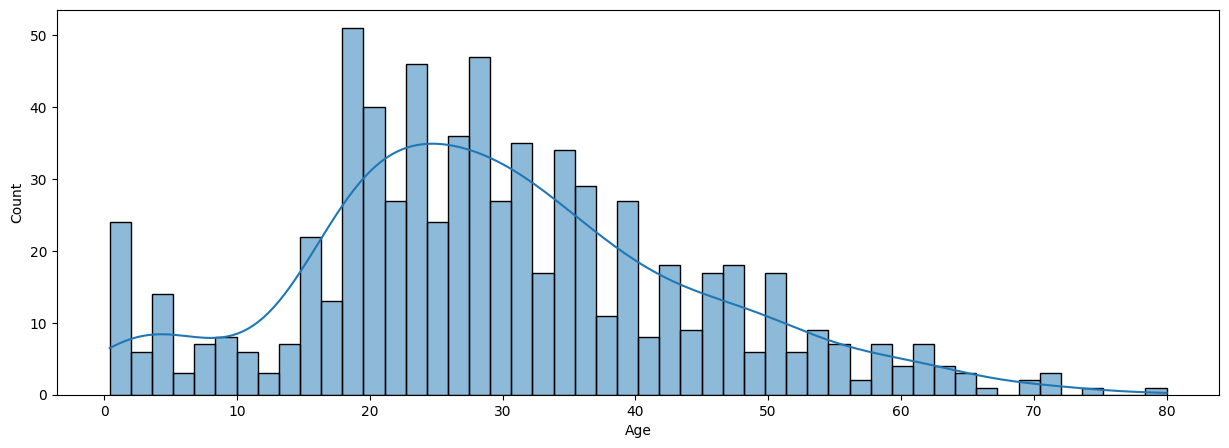

In [1023]:
figure, axis = plt.subplots(1, 1, figsize=(15, 5))
sns.histplot(dataset_df, x='Age', bins=50, kde=True, ax=axis)


<AxesSubplot: xlabel='Fare', ylabel='Count'>

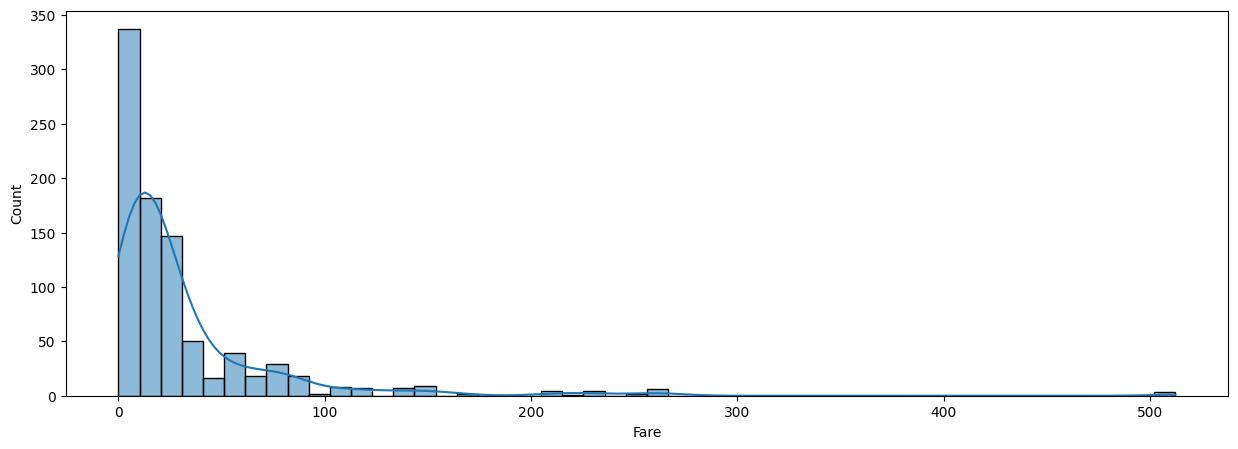

In [1024]:
figure, axis = plt.subplots(1, 1, figsize=(15, 5))
sns.histplot(dataset_df, x='Fare', bins=50, kde=True, ax=axis)

## Clean data

<AxesSubplot: >

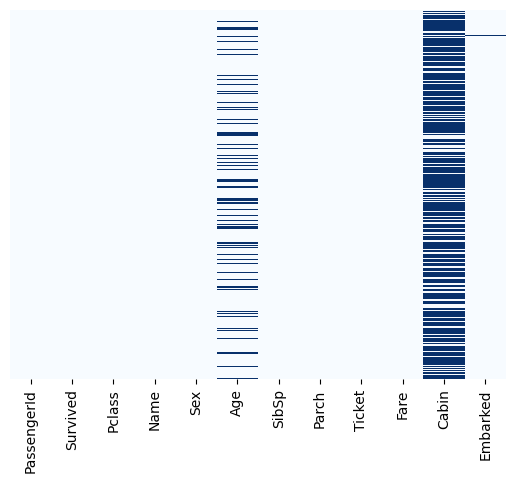

In [1025]:
sns.heatmap(dataset_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

<AxesSubplot: xlabel='Sex', ylabel='Age'>

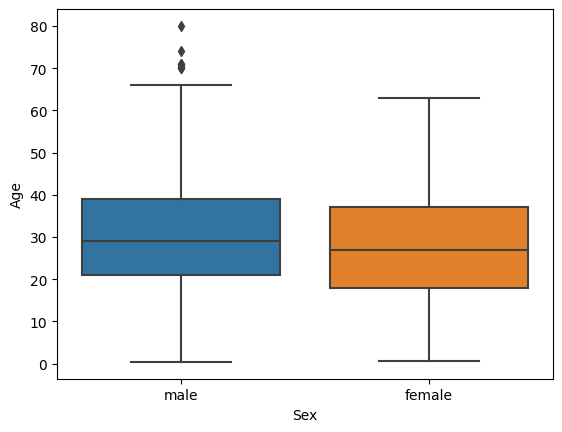

In [1026]:
sns.boxplot(dataset_df, x='Sex', y='Age')

In [1027]:
allowed_titles = ['Mr', 'Miss', 'Mrs', 'Master', 'Dr']
dataset_df['Title'] = dataset_df['Name'].apply(lambda x : x.split(' ')[1].strip('123,./!?'))
dataset_df['Title'] = dataset_df['Title'].apply(lambda x : x if x in allowed_titles else 'No title')
dataset_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,No title
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [1028]:
dataset_df['Age'] = dataset_df.groupby(['Pclass', 'Sex', 'Title']).Age.apply(lambda x: x.fillna(x.median()))
dataset_df

/var/folders/g0/db_6133s4c72c83lmc3808m40000gn/T/ipykernel_76449/627684707.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dataset_df['Age'] = dataset_df.groupby(['Pclass', 'Sex', 'Title']).Age.apply(lambda x: x.fillna(x.median()))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,No title
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [1029]:
mode_port = dataset_df['Embarked'].mode()[0]
dataset_df['Embarked'].fillna(mode_port, inplace=True)

In [1030]:
dataset_df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'], inplace=True)
dataset_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,No title
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,18.0,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


<AxesSubplot: >

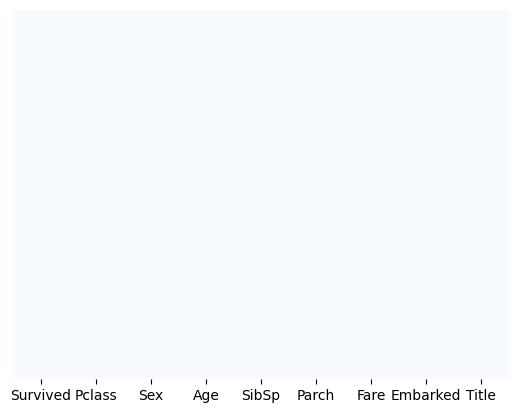

In [1031]:
sns.heatmap(dataset_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [1032]:
categorical_columns = [column for column in dataset_df.columns if dataset_df[column].dtype in [object, bool]]

for column in categorical_columns:
  dataset_df[column] = dataset_df[column].astype('category').cat.codes
dataset_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2,3
1,1,1,0,38.0,1,0,71.2833,0,4
2,1,3,0,26.0,0,0,7.9250,2,2
3,1,1,0,35.0,1,0,53.1000,2,4
4,0,3,1,35.0,0,0,8.0500,2,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,5
887,1,1,0,19.0,0,0,30.0000,2,2
888,0,3,0,18.0,1,2,23.4500,2,2
889,1,1,1,26.0,0,0,30.0000,0,3


## Split data

In [1033]:
x = dataset_df.drop(columns=['Survived']).values
y = dataset_df['Survived'].values
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

## Experiment 1: SciKit Learn Logistic Regression

In [1034]:
classifier = LogisticRegression()


In [1035]:
classifier.fit(x_train, y_train)

/Users/vladimirskvortsov/miniforge3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1036]:
y_predicted_test = classifier.predict(x_test)
y_predicted_test

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0])

<AxesSubplot: >

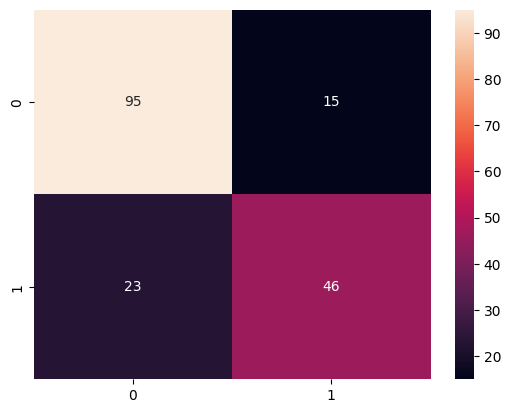

In [1037]:
cm = sklearn.metrics.confusion_matrix(y_test, y_predicted_test)
sns.heatmap(cm, annot=True, fmt='d')

In [1038]:
print(sklearn.metrics.classification_report(y_test, y_predicted_test))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       110
           1       0.75      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179



## ## Experiment 2: SciKit Learn Naive Bayes Classifier

In [1039]:
classifier = MultinomialNB()

In [1040]:
classifier.fit(x_train, y_train)

MultinomialNB()

In [1041]:
classifier.fit(x_train, y_train)

MultinomialNB()

In [1042]:
y_predicted_test = classifier.predict(x_test)
y_predicted_test

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0])

<AxesSubplot: >

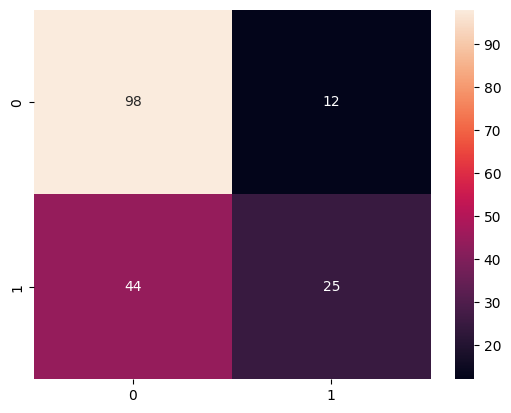

In [1043]:
cm = sklearn.metrics.confusion_matrix(y_test, y_predicted_test)
sns.heatmap(cm, annot=True, fmt='d')

In [1044]:
print(sklearn.metrics.classification_report(y_test, y_predicted_test))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78       110
           1       0.68      0.36      0.47        69

    accuracy                           0.69       179
   macro avg       0.68      0.63      0.62       179
weighted avg       0.68      0.69      0.66       179



## Experiment 3: Keras Sequential Model

In [1045]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(128, input_dim=x_train.shape[1], activation='relu'))

for i in range(15):
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Dense(1, activation='sigmoid'))

In [1046]:
model.compile(
  loss='binary_crossentropy',
  metrics=['binary_accuracy'],
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
)

In [1047]:
history = model.fit(
  x_train,
  y_train,
  batch_size=100,
  epochs=1000,
  validation_data=(x_test, y_test),
  verbose=1,
)

Epoch 1/1000
8/8 [==============================] - 1s 19ms/step - loss: 0.7535 - binary_accuracy: 0.5506 - val_loss: 0.6870 - val_binary_accuracy: 0.6145
Epoch 2/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.7113 - binary_accuracy: 0.5632 - val_loss: 0.6836 - val_binary_accuracy: 0.6145
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6996 - binary_accuracy: 0.5744 - val_loss: 0.6800 - val_binary_accuracy: 0.6145
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6973 - binary_accuracy: 0.6011 - val_loss: 0.6769 - val_binary_accuracy: 0.6145
Epoch 5/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6774 - binary_accuracy: 0.6039 - val_loss: 0.6745 - val_binary_accuracy: 0.6145
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6836 - binary_accuracy: 0.5857 - val_loss: 0.6722 - val_binary_accuracy: 0.6145
Epoch 7/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6

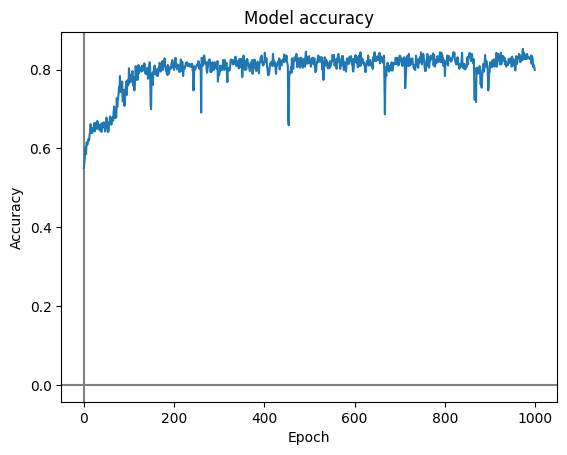

In [1048]:
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(history.history['binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [1049]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
accuracy

6/6 [==============================] - 0s 998us/step - loss: 0.6466 - binary_accuracy: 0.7430


0.74301677942276

## Experiment 4: Catboost

In [1050]:
estimator = ycb.CatBoostClassifier(eval_metric='Accuracy', verbose=0)

In [1051]:
param_grid={
  'learning_rate': [0.01, 0.02, 0.03],
  'depth': [6, 7, 8],
  'iterations': [400, 600, 1000],
}

grid = sklearn.model_selection.GridSearchCV(
  estimator=estimator,
  verbose=1,
  param_grid=param_grid,
  cv=3,
  scoring='accuracy',
  n_jobs=-1,
)

grid.fit(x_train, y_train)

classifier = grid.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [1052]:
grid.best_score_

0.8202614379084968

In [1053]:
grid.best_params_

{'depth': 8, 'iterations': 400, 'learning_rate': 0.01}

In [1054]:
classifier.save_model('model.h5')